# TP1 du module 5 : l'apprentissage supervisé

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
* Préparer des jeux de données pour l'apprentissage supervisé
* Entraîner un modèle d'arbre de décision
* Evaluer les performances d'un modèle de classification
* Entraîner et évaluer un modèle de régression

In [42]:
import numpy as np
# Ajoutez ici les imports de librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Création de modèles de classification pour le Titanic

1. Commencez par recharger votre jeu de données sur le Titanic, à partir du csv que vous aviez enregistré à la fin du TP du module 4. Ainsi, vous obtenez un jeu de données déjà préparé pour l'apprentissage.

In [6]:
titanic = pd.read_csv('titanic.csv')

2. Séparer vos données en mettant d'un côté les attributs, de l'autre la cible à prédire. Ensuite, séparer encore ces groupes entre entraînement et test (proportion de 0.2)

In [8]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2,stratify=y)

3. Créez un arbre de décision, sans option particulière pour l'instant. Entraînez-le, puis évaluez-le à l'aide de l'accuracy, sur les jeux de données crées ci-dessus. Comparez ce score avec le score moyen obtenu en effectuant une validation croisée sur l'ensemble du jeu de données.

In [26]:
model = DecisionTreeClassifier()

model.fit(train_X, train_Y)

y_pred = model.predict(test_X)



scores = cross_val_score(model, train_X, train_Y, cv=10)

print("Score obtenu par accuracy",accuracy_score(test_Y, y_pred)*100)

print("Score obtenu par validation croisé",np.mean(scores)*100)

Score obtenu par accuracy 76.53631284916202
Score obtenu par validation croisé 79.77112676056338


4. Calculer également la précision et le rappel. Cherchez notamment dans la documentation comment indiquer laquelle des deux classes considérer comme la classe positive. Quelles observations pouvez-vous faire ?

In [30]:
model.fit(train_X, train_Y)
y_pred = model.predict(test_X)

print("Accuracy : ", np.round(accuracy_score(test_Y, y_pred)*100,2),"%")

print("Rappel : ",np.round(recall_score(test_Y, y_pred)*100),"%")

Accuracy :  76.54 %
Rappel :  71.0 %


**Observations :** il n'y a pas d'écart important entre accuracy, précision et rappel. Il semble donc qu'il n'y ait pas de déséquilibre notable au niveau des prédictions.

5. Afficher la matrice de confusion pour cet arbre de décision, sur le jeu de test. Commencez par simplement l'afficher de manière textuelle, puis travailler votre affichage à l'aide de matplotlib afin d'ajouter des couleurs relatives au nombre d'éléments dans chaque case de la matrice.

Matrice de confusion :
 [[88 22]
 [20 49]]


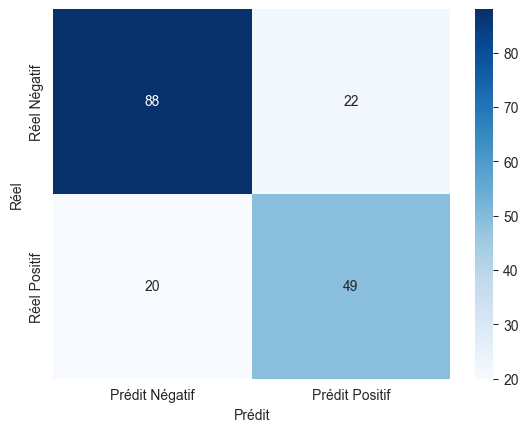

In [37]:
cm = confusion_matrix(test_Y, y_pred)
print("Matrice de confusion :\n", cm)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Prédit Négatif", "Prédit Positif"],
            yticklabels=["Réel Négatif", "Réel Positif"])
plt.ylabel("Réel")
plt.xlabel("Prédit")
plt.show()


6. Quelle est la profondeur de l'arbre de décision que vous avez créé ?

In [38]:
profondeur = model.tree_.max_depth
print("Profondeur de l'arbre : ",profondeur)

Profondeur de l'arbre :  16


7. Créer un deuxième arbre de décision, en limitant sa profondeur à trois niveaux. Affichez son accuracy sur les données de test : que constatez-vous, et comment pouvez-vous l'expliquer ?

In [47]:
model_limite = DecisionTreeClassifier(max_depth=3)
model_limite.fit(train_X, train_Y)
y_pred_limite = model_limite.predict(test_X)

print("Accuracy : ", np.round(accuracy_score(test_Y, y_pred_limite)*100,2),"%")

print("Rappel : ",np.round(recall_score(test_Y, y_pred_limite)*100),"%")


# on constate que l'arbre limité en profondeur est plus précis

Accuracy :  81.56 %
Rappel :  64.0 %


**Observation :** en limitant la profondeur de l'arbre, le score augmente. Cela est du au fait que limiter la profondeur de l'arbre permet d'éviter un phénomène de surapprentissage.

8. Visualisez ce nouvel arbre de décision : prenez garde à bien faire apparaître les labels du jeu de données, et remplacez les valeurs 0 et 1 par des labels textuels de votre choix (ex : 'Died' et 'Survived'). Quelles observations pouvez-vous faire sur cet arbre ? Les décisions vous paraissent-elles cohérentes avec l'analyse des données faites dans le module 4 ?

TypeError: can only concatenate str (not "numpy.int64") to str

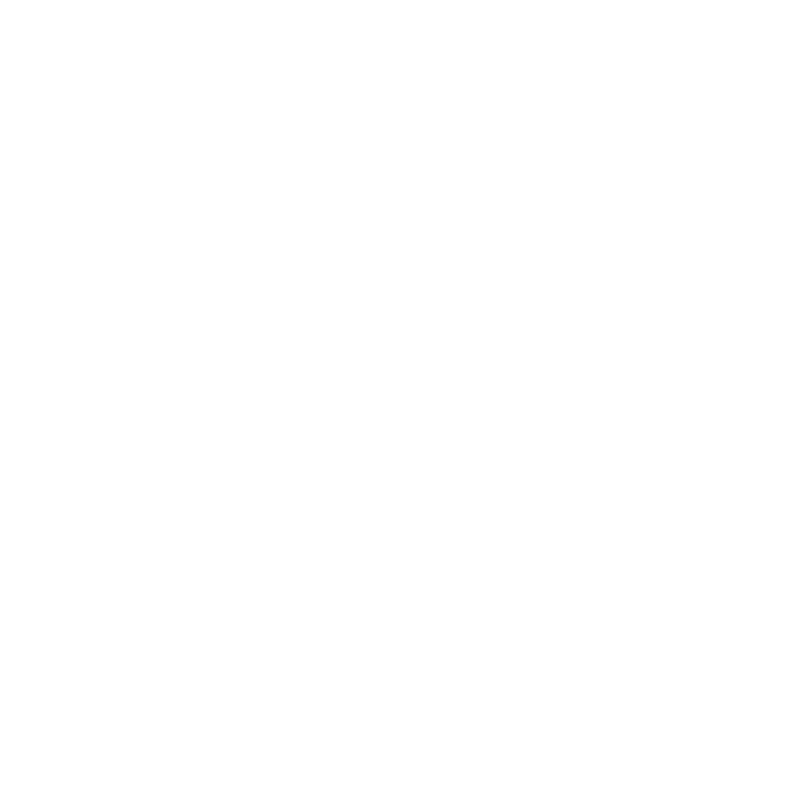

In [49]:
fig = plt.figure(figsize = (10,10))
plot_tree(model_limite,filled=True,feature_names=train_X.columns,class_names=titanic['Survived'].unique())
plt.show()


9. Vous allez à présent comparer les performances d'arbre de profondeurs différentes. Créez différents arbre, en faisant varier la profondeur entre 1 et la profondeur trouvée à la question 6. Pour chaque arbre, calculer son score (accuracy) à l'aide d'une validation croisée à 5 feuilles. Sur un graphique, représentez l'évolution du score en fonction de la profondeur de l'arbre. 
Affichez également la profondeur pour lequel le score est maximal.
Qu'observez-vous ?

**Observation :** au départ, le score augmente avec la profondeur. Avec une profondeur trop basse, on a du sous-apprentissage. Mais ensuite, le score diminue alors que la profondeur augmente : on bascule dans du sur-apprentissage. Une profondeur de 5 semble donner les meilleurs résultats.

10. Comparez deux critères pouvant être utilisé pour constuire l'arbre de décision : coefficient de gini et mesure d'entropie. Pour la profondeur de l'arbre,
Avec un validation croisée, affichez sur un histogramme les trois valeurs moyennes obtenues. Voyez-vous un critère qui se détache des autres par ses performances ?

**Observations :** les performances des deux modèles ne présentent pas de différence pour le jeu de données du Titanic.

## Créer un modèle de regression

Pour tester le concept de modèle de régression, nous ne pouvons pas utiliser le jeu de données sur le Titanic. A la place, nous allons nous intéresser à un jeu de données présentant l'évolution de la maladie chez des patients diabétiques. L'objectif sera de prédire l'évolution de la maladie en un an, en se basant sur des données mesurées un an avant. Ce jeu de données est directement disponible via la librairie scikit-learn. Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

1. Commencez par charger les données dans deux dataframe : un pour les attributs, un pour la cible à prédire.

2. Affichez les premières lignes des attributs. Avez-vous bien repéré contenant la valeur à prédire ?

3. Commencez par effectuer une régression linéaire, en prenant bien soin d'avoir des données d'entraînement et de test. Quelle erreur quadratique moyenne obtenez-vous ? Comment analysez-vous ce résultat ?

4. Faites une représentation graphique des données réelles par rapport aux données prédites par le modèle : pour chaque attribut, représentez graphiquement les valeurs sur l'abscisse, et l'évolution de la maladie (réelle et prédite) sur les ordonnées. Colorez différement les données en fonction de si elles sont réelles ou prédites.

5. Sur un seul graphe, affichez les valeurs prédites en fonction des valeurs réelles. Tracez également la droite d'équation y=x. Quelles observations faites-vous ?

6. Pour une régression linéaire, les valeurs sur les attributs sont cruciales. Par défaut lorsque vous avez chargé vos données avec Scikit-learn, celles-ci était normalisées. Rechargez-les en ajoutant l'option pour obtenir les données brutes. Affichez les premières lignes du dataset pour constater les différences de plage de valeurs.

7. Réentraînez un modèle de régression linéaire sur ces données non normalisées? Que constatez-vous ?

8. Proposez des modèles de régression polynomiale : tester plusieurs degrés de polynôme, entre 1 et 20. Pour chacun, calculez le score obtenu, et affichez-le. Représentez graphiquement l'évolution de l'erreur quadratique moyenne en fonction du degré du polynome.
**Attention :** pour cet partie, réfléchissez aux données que vous voulez utiliser : normalisées ou non ?

Constatez-vous une différence avec la régression linéaire simple ?

## Régression avec un arbre de décision

Il est aussi possible d'utiliser les arbres de décision pour construire un modèle de régression. En utilisant la classe adéquate de scikit-learn, proposez un arbre de régression sur le jeu de données du diabètes. Prenez soin d'analyser la profondeur de l'arbre, afin de choisir celle qui vous parait la plus pertinente. Affichez l'arbre obtenant le meilleur score.

Comparez les résultats obtenus avec ceux de la régression linéaire et de la régression polynomiale.